<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Experiments and Hypothesis Testing

_Authors: Alexander Egorenkov (DC), etc._

---

<a id="learning-objectives"></a>
### Learning Objectives
- Explain the difference between causation and correlation
- Understand and calculate basic descriptive statistics - mean, median, mode, range, variance, standard deviation
- Know when to use a box plot and how to draw it using Pandas
- Know what a model is and one way to evaluate its accuracy
- Understand what a normal distribution is
- Identify what missing data is and how to handle it

- Test a hypothesis using a sample case study

### Lesson Guide
- [Data source](#data)
	- [Exploring the advertising data](#exploring)
- [Descriptive statistics fundamentals](#descriptive)
    - [Math review](#math)
        - [Independent exercise 1](#ie1)
        - [Measures of central tendency](#measures)
        - [Independent exercise 2](#ie2)
        - [Anscombe's quartet](#anscombe)
        - [Box plots: Show quartiles (and outliers) for one or more numerical variables](#box)
    - [Measuring distance](#distance)
    - [Measures of dispersion: Standard deviation and variance](#dispersion)
        - [Independent exercise 3](#ie3)
    - [Understanding distributions](#distributions)
        - [What is the normal distribution?](#what)
        - [Sampling bias](#bias)
    - [Measuring relationships](#relationships)
        - [Covariance](#covariance)
        - [Correlation](#correlation)
        - [The variance-covariance matrix](#matrix)
        - [Independent exercise 4](#ie4)

#### [Optional](#optional):
- [Missing data](#missing)
	- [Types of missing data](#types)
	- [Class imbalance](#class)
  	- [Error types](#error)
- [Introduction to hypothesis testing](#hypothesis)
	- [Validate your findings](#validate)
	- [Confidence intervals](#confidence)
- [Relation to machine learning](#relation)
- [Additional practice materials](#practice)

<a id="data"></a>
## Data source

---

Today, we’ll use advertising data from an example in the book [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/).
- This is a well-known, standard introduction to machine learning.
- The book has a more advanced version — [Elements of Statistical Learning](http://web.stanford.edu/~hastie/ElemStatLearn/) — if you are comfortable with linear algebra and statistics at the graduate level.

#### Code-Along: Importing Today's Data\*
> **\***You may need to install `seaborn` before you can use it. To do so, just run:  
> `$ conda install seaborn`

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# this allows plots to appear directly in the notebook
%matplotlib inline

# this selects the 'style' that matplotlib will use to generate plots
plt.style.use('fivethirtyeight')

In [3]:
# read data into a DataFrame

# we use index_col to tell Pandas that the first column in the data has row labels
data = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0)

In [4]:
## examine the data
# print the shape
print(f'date shape: {data.shape}')

# print the first 5 rows
data.head()

date shape: (200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<a id="exploring"></a>
### Exploring the advertising data

Let's pretend you work for the company that manufactures and markets this new device. The company might ask you the following: "On the basis of this data, how should we spend our advertising money in the future?"

In [5]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### What are the 'features', 'independent variables', or 'predictors'?

In [6]:
# Answer:

# TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars).    
# Radio: Advertising dollars spent on radio.
# Newspaper: Advertising dollars spent on mewspaper.

#### What is the 'outcome' or 'response'?

In [7]:
# Answer:

# Sales of a single product in a given market (in thousands of widgets).

#### What do you think each *row* in the data set represents?

In [8]:
# Answer:

# Every row in the data set refers to a market where the ads have been shown.

<a id="descriptive"></a>
## Descriptive statistics fundamentals
---

- **Objective:** Code summary statistics using NumPy and Pandas: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation.

<a id="math"></a>
### Math review

---

#### Sigma Notation: A Quick Review

- The sum of a constant, $k$, $n$ times:
$$\sum_{i=1}^nk$$

In [9]:
# k + k + k + k + ... + k
# -or-
# total = sum(k for i in range(1, n+1))

- The sum of all numbers from 1 up to and including $n$:
$$\sum_{i=1}^ni$$

In [10]:
# 1 + 2 + 3 + ... + n
# -or-
# total = sum(range(1, n+1))

- The sum of all $x$ from the first $x$ entry to the $n$th $x$ entry:
$$\sum_{i=1}^nx_i$$

In [11]:
# x_1 + x_2 + x_3 + ... + x_n
# -or-
# total = sum(x)

<a id="ie1"></a>

#### Independent exercise 1 (~5 minutes)

(_Optional: Try writing down the mathematical notation for the following questions, as well._)

In [12]:
# compute the sum of seven 4s using base Python
# idea 1:
simple_sum = 7*4
print(f'the value should be {simple_sum}')

# idea 2:
fours_sum = 0
for i in range(7):
    fours_sum += 4
print(f'sum from for loop is {fours_sum}')
    
# idea 3:
fours_list = [4]*7
print(f'sum of {fours_list} is {sum(fours_list)}')

the value should be 28
sum from for loop is 28
sum of [4, 4, 4, 4, 4, 4, 4] is 28


In [13]:
# compute the sum of seven 4s using NumPy
# idea 1:
print(f'the value should be {np.sum(fours_list)}')

# idea 2:
fours_col1 = np.array(fours_list)
print(f'sum of {fours_col1} is {fours_col1.sum()}')

# idea 3:
fours_col2 = np.repeat(4, 7)
print(f'sum of {fours_col2} is {fours_col2.sum()}')

the value should be 28
sum of [4 4 4 4 4 4 4] is 28
sum of [4 4 4 4 4 4 4] is 28


In [14]:
# compute the sum of 1 through 10 using base Python
# idea 1:
simple_sum = 1+2+3+4+5+6+7+8+9+10
print(f'the value should be {simple_sum}')

# idea 2:
range_sum = list(range(1,11))
print(f'sum of {range_sum} is {sum(range_sum)}')
    
# idea 3:
loop_sum = 0
for i in range(10):
    loop_sum += (i+1)
print(f'sum from for loop is {loop_sum}')

the value should be 55
sum of [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] is 55
sum from for loop is 55


In [15]:
# using the data.TV column, compute the total spent on TV advertising budgets
# idea 1:
simple_sum = data.TV.sum()
print(f'sum using pandas function is {simple_sum}')

# idea 2:
builtin_sum = sum(data['TV'])
print(f'sum using built-in function is {builtin_sum}')
    
# idea 3:
loop_sum = 0
for i in data['TV']:
    loop_sum += (i)
print(f'sum from for loop is {loop_sum}')

sum using pandas function is 29408.5
sum using built-in function is 29408.499999999996
sum from for loop is 29408.499999999996


<a id="measures"></a>
### Measures of central tendency

- Mean
- Median
- Mode

#### Mean
The mean — also known as the average or expected value — is defined as:
$$E[X] = \bar{X} =\frac 1n\sum_{i=1}^nx_i$$

It is determined by summing all data points in a population and then dividing the total by the number of points. The resulting number is known as the mean or the average.

> *Be careful* — **the mean can be highly affected by outliers**. 
> - For example, the mean of a very large number and some small numbers will be much larger than the "typical" small numbers. 
> - Earlier, we saw that the mean squared error (MSE) was used to optimize linear regression. 
> - Because this mean is highly affected by outliers, the resulting linear regression model is, too.

#### Median
The median refers to the midpoint in a series of numbers. To find the median:

- Arrange the numbers in order from smallest to largest.
    - If there is an odd number of values, the middle value is the median.
    - If there is an even number of values, the average of the middle two values is the median.

Notice that the median is not as affected by outliers. So, when extreme outliers are present, it does a better job of representing the "typical" value in a set.

$$ 0,1,2,[3],5,5,1004 $$

$$ 1,3,4,[4,5],5,5,7 $$

Although the median has many useful properties, the mean is easier to use in optimization algorithms.
- Consequently, median is more often used in analysis than in machine learning algorithms.

#### Mode
The mode of a set of values is the value that occurs most often.
A set of values may have more than one mode, or no mode at all.

$$1,0,1,5,7,8,9,3,4,1$$ 

$1$ is the mode, as it occurs the most often (three times).

<a id="ie2"></a>
#### Independent exercise 2 (~10 minutes)

In [16]:
# find the mean of the data.radio series using base Python
print(sum(data.radio)/len(data.radio))

23.264000000000024


In [17]:
# find the mean of the data.radio series using NumPy
np_array = data.radio.values
print(type(np_array))

print(np_array.mean())

<class 'numpy.ndarray'>
23.264000000000006


In [18]:
# find the mean of the data.radio series using Pandas
print(type(data.radio))

print(data.radio.mean())

<class 'pandas.core.series.Series'>
23.264000000000006


In [19]:
# what was the median advertising budget for radio (using Pandas)?
print(data.radio.median())

22.9


In [20]:
# use Pandas to find the most common budget amount among all 200 markets
markets_sorted = data.radio.value_counts()
markets_sorted

5.7     3
4.1     3
26.7    2
18.1    2
43.0    2
10.8    2
24.6    2
49.4    2
48.9    2
33.5    2
18.4    2
2.1     2
11.6    2
36.9    2
9.3     2
4.9     2
8.4     2
27.7    2
2.6     2
14.3    2
49.0    2
42.0    2
1.5     2
27.5    2
3.5     2
39.6    2
13.9    2
41.7    2
16.0    2
3.4     2
       ..
33.2    1
42.7    1
42.8    1
7.7     1
11.7    1
7.8     1
1.6     1
19.6    1
1.4     1
17.4    1
47.7    1
12.1    1
25.9    1
36.3    1
31.6    1
27.1    1
28.9    1
32.3    1
15.4    1
46.8    1
8.6     1
8.2     1
3.7     1
14.8    1
29.6    1
37.6    1
26.9    1
40.6    1
34.3    1
24.0    1
Name: radio, Length: 167, dtype: int64

<a id='anscombe'></a>

### Anscombe's quartet

---

These descriptive statistics come from a data set constructed in 1973 by the statistician Francis Anscombe. 
- It's a classic demonstration of the importance of *data visualization*.

Below are the summary statistics for four plots. 
- **What do you think the visualization for each plot would look like?**

<img src="./assets/quartet.png"/>

You can probably already guess what the answer is: Although the four plots have the same summary statistics, 
they are actually completely different. 
- **Look what happens when we visualize them together.**

<img src="./assets/quartet_viz.png" style="margin: auto; width: 550px;"/>

<a id="box"></a>
### Box plots: Show quartiles (and outliers) for one or more numerical variables
---

We can use boxplots to ***quickly summarize distributions***.

Box plots are *packed* with good info!

**Five-number summary:**
- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(It's more useful than mean and standard deviation for describing skewed distributions.)

**Interquartile Range (IQR)** 

IQR = Q3 - Q1

**Outliers** are defined as:

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

#### Let's see how box plots are generated so we can best interpret them

In [21]:
## first, read in the drinks data
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = '../datasets/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

In [22]:
# sort the spirit column
drinks.spirit.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   2,   2,
         3,   3,   3,   3,   3,   3,   3,   3,   4,   4,   4,   5,   5,
         6,   6,   6,   7,   9,  11,  11,  12,  13,  15,  15,  16,  16,
        18,  18,  18,  18,  19,  21,  21,  22,  22,  25,  25,  27,  29,
        31,  31,  34,  35,  35,  35,  35,  38,  39,  41,  41,  42,  42,
        44,  46,  50,  51,  55,  56,  57,  60,  61,  63,  63,  65,  67,
        68,  69,  69,  69,  71,  71,  72,  74,  75,  76,  76,  79,  81,
        84,  87,  87,  88,  97,  97,  98,  98, 100, 100, 100, 100, 101,
       104, 104, 112, 114, 114, 114, 117, 117, 118, 118, 122, 122, 124,
       126, 128, 131, 132, 133, 133, 135, 137, 138, 145, 147, 151, 152,
       154, 156, 157, 158, 160, 170, 173, 173, 176, 178, 179, 186, 189,
       192, 194, 200, 202, 205, 215, 215, 216, 221, 226, 237, 24

In [23]:
# show "five-number summary" for spirit
drinks.spirit.describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

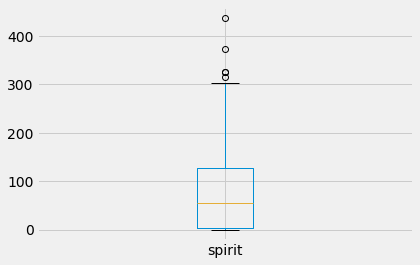

In [24]:
# examine with box plot
drinks.spirit.plot(kind='box');

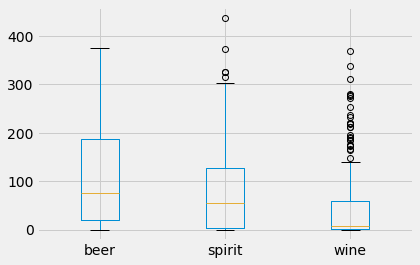

In [25]:
# include multiple variables
drinks.drop('liters', axis=1).plot(kind='box');

# Or just: drinks.drop('liters', axis=1).boxplot();
# (This only works on DataFrames, not Series)

#### *Grouped* box plots

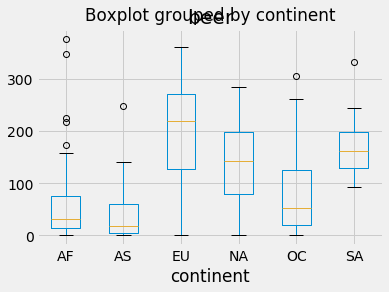

In [26]:
# example 1: box plot of beer servings grouped by continent
drinks.boxplot(column='beer', by='continent');

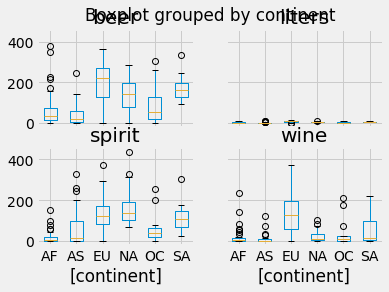

In [27]:
# example 2: box plot of all numeric columns grouped by continent
drinks.boxplot(by='continent');

<a id="distance"></a>
### Measuring distance

#### How do we measure distance?

One method is to take the difference between two points:

$$X_2 - X_1$$

However, this can be inconvenient because of negative numbers.

We often use the following square root trick to deal with negative numbers. Note this is equivalent to the absolute value:

$$\sqrt{(X_2-X_1)^2} = | X_2 - X_1 |$$

#### What about distance in multiple dimensions?

We can turn to the Pythagorean theorem.

$$a^2 + b^2 = c^2$$

To find the distance along a diagonal, it is sufficient to measure one dimension at a time:

$$\sqrt{a^2 + b^2} = c$$

*More generally*, we can write this as the norm (You'll see this in machine learning papers):

$$\|X\|_2 = \sqrt{\sum{x_i^2}} = c$$

#### What if we want to work with points?

For points $\vec{x}: (x_1, x_2)$ and $\vec{y}: (y_1, y_2)$ we can write:

$$\sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2} = c$$
$$or$$
$$\sqrt{\sum{(x_i - y_i)^2}} = c$$
$$or$$
$$\| \vec{x} - \vec{y} \| = c$$

> You may be more familiar with defining points as $(x, y)$ rather than $(x_1, x_2)$. 
> - However, in machine learning it is much more convenient to **define each coordinate using the same base letter with a different subscript**.

> - This allows us to easily represent a 100-dimensional point, e.g., $(x_1, x_2, ..., x_{100})$. 
> - If we use the other method, we would soon run out of letters!

<a id="dispersion"></a>
### Measures of dispersion: Standard deviation and variance

**Standard deviation** (SD, $σ$ for population standard deviation, or $s$ for sample standard deviation) is a measure that is used to quantify the amount of *variation or dispersion from the mean* of a set of data values.

- A ***low*** standard deviation means that most of the numbers are close to the average. 
- A ***high*** standard deviation means that the numbers are spread out.

Standard deviation is the square root of variance:

$$variance = \frac {\sum{(x_i - \bar{X})^2}} {n-1}$$

$$s = \sqrt{\frac {\sum{(x_i - \bar{X})^2}} {n-1}}$$

> **Standard deviation** is often used because it is *in the same units as the original data!* 
> - By glancing at the standard deviation, we can immediately estimate how "typical" a data point might be by how many standard deviations it is from the mean. 
> - Furthermore, standard deviation is the only value that makes sense to visually draw alongside the original data.

> **Variance** is often used for efficiency in computations. 
> - The square root in the SD always increases with the function to which it is applied. 
> - So, removing it can *simplify* calculations (e.g., taking derivatives), particularly for tasks such as optimization.

<a id="ie3"></a>
#### Independent exercise 3 (~10 minutes)

In [28]:
# assign the first 5 rows of the beer data from drinks to a variable
heady_beer = drinks.beer.head() # it's a pun, get it?

In [29]:
# calculate the mean of the beer data by hand
mean_beer = sum(drinks.beer)/len(drinks.beer)
print(mean_beer)

106.16062176165804


In [30]:
# calculate variance by hand
var_beer = sum((drinks.beer-mean_beer)**2)/(len(drinks.beer)-1)
print(var_beer)

10229.927191278055


In [31]:
# calculate standard deviation by hand
from math import sqrt

print(sqrt(var_beer))

101.14310253931335


In [32]:
# calculate the mean, variance, and standard deviation using Pandas
print(drinks.beer.mean())
print(drinks.beer.var())
print(drinks.beer.std())

106.16062176165804
10229.927191278066
101.1431025393134


<a id="distributions"></a>
## Understanding distributions

- What is an event space?
  - A listing of all possible occurrences.

- What is a probability distribution?
  - A function that describes how events occur in an event space.

- What are general properties of probability distributions?
  - All probabilities of an event are between 0 and 1.
  - The probability that something occurs is almost certain, or 1.

<a id="what"></a>
### What is the Normal Distribution?

- A normal distribution is often a *key assumption* to many models.

  - In practice, if the normal distribution assumption is not met, it's *not* the end of the world. 
  - Your model is just less efficient in most cases.

- The normal distribution depends on the *mean* and the *standard deviation*.
    - The mean determines the center of the distribution. 
    - The standard deviation determines the height and width of the distribution.

<img src="./assets/normal.png" style="margin: auto; width: 700px;"/>

- Normal distributions are symmetric, bell-shaped curves.

- When the standard deviation is large, the curve is short and wide.

- When the standard deviation is small, the curve is tall and narrow.

#### Why do we care about normal distributions?

- They often show up in nature.
- Aggregated processes tend to distribute normally, regardless of their underlying distribution — provided that the processes are uncorrelated or weakly correlated (central limit theorem).
- They offer effective simplification that makes it easy to make approximations.

#### Plot a histogram of 1,000 samples from a random normal distribution:

The `np.random.randn(numsamples)` function will draw from a random normal distribution with a mean of 0 and a standard deviation of 1.

- To plot a histogram, pass a NumPy array with 1000 samples as the only parameter to `plt.hist()`.
- Change the number of bins using the keyword argument `bins`, e.g. `plt.hist(mydata, bins=50)`.

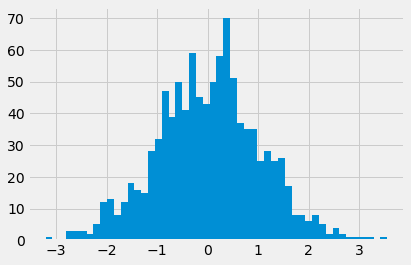

In [33]:
# plot a histogram of several random normal samples from NumPy
plt.hist(np.random.randn(1000), bins=50);

<a id="sampling"></a>
## Sampling bias
---

**Sampling bias** occurs when a sample is collected in such a way that some members of the intended population are more or less likely to be included than others.

- This can happen when a sample is taken non-randomly — either implicitly or explicitly.

When we have non-random sampling that results in sampling bias, it can affect the inferences or results of our analyses. 
- We must be careful not to attribute our results to the process we observe when they could actually be because of a bias in our sampling.

> - ***Basically:*** When we have sampling bias, we aren't measuring what we think we are measuring.

#### Examples of sampling bias

- **Pre-screening:** Purposely restricting the sample to a specific group or region.
    - This typically happens when people try to study priority areas to save costs and assume priority areas are the same as random areas.

- **Self-selection:** When someone has the ability to non-randomly decide what is included in a sample.
    - This typically happens in surveys and polls but can also be an issue with other kinds of reporting.

- **Survivorship bias:** When we select only surviving subjects in a sample over time.
    - This might happen when we only look at existing customers and assume they have the same characteristics as new customers.

#### Problems That Arise From Sampling Bias
- We could overestimate or underestimate means and sample statistics for simple characteristics.
- It's possible to have artificial correlation where there should be none.

#### A solution: Stratified random sampling

We've discussed how it is important to obtain a random sample of our population. 
- However, sometimes it is more effective to apply some reasoning to our sampling process. 
- By optimizing how we choose samples, we can possibly create a more accurate model using fewer samples.

***Stratified random sampling*** ensures we capture important population characteristics in the random sample. 
- We effectively break the population into "strata" (groups), then randomly sample from each group to obtain our overall sample.

- *For example*, if we know that the population is half males and half females, we can make sure that our sample is half male and half female.
- This method depends on knowing **key population statistics**.

<a id="relationships"></a>
## Measuring relationships

<a id="covariance"></a>
### Covariance

***Covariance*** is a measure of the *joint* variability between two random variables.

You can think of this as a measure of linear association. If you have a variance of Y and a variance of X, the covariance is the amount of variance they share.

$$cov(X, Y) = \frac {\sum{(x_i - \bar{X})(y_i - \bar{Y})}} {n}$$

> We can gain insight into covariance by looking closely at the formula above. First, observe that the formula effectively pairs the first $x$ data point with the first $y$ data point: $(x_1, y_1)$. All computations are done solely on these pairs of points.

> Second, let's ask ourselves, **when would covariance be positive**? 
> - From the numerator, covariance would be positive if, for all pairs of data points, $(x_i - \bar{X})$ and $(y_i - \bar{Y})$ are 1) *both positive or 2) both negative*.

> This occurs when: 
> 1. Both data points are greater than their respective means.  
> **-or-**
> 2. Both data points are less than their respective means!
>
> So, if the $x$ data points vary from their mean in the same way the $y$ data points vary from their mean, covariance will be positive.

> Third, let's consider: **Might outliers affect covariance?** 
> - *Yes!* Given the structure of the formula (a sum of terms), a large outlier pair far from the means could strongly pull the covariance in one direction.

**Covariance Expressed Using Matrix Notation**

$$cov(\mathbf{X}, \mathbf{Y}) = \mathbb{E}[(\mathbf{X}-\mathbb{E}[\mathbf{X}])(\mathbf{Y}-\mathbb{E}[\mathbf{Y}])]$$

**A Useful Special Case (Used Below)**

$$cov(X, X) = \frac {\sum{(x_i - \bar{X})^2}} {n} = var(X) = \sigma_X^2$$

<a id="correlation"></a>
### Correlation

While *covariance* is a useful measure, it can be difficult to compare covariances, as they are **not *standardized***.

Instead we can use the ***correlation***, which measures the same effect but reports it as a range from -1 to 1. 
- 1 represents perfect covariance and correlation.
- 0 represents no correlation.
- -1 represents perfect inverse correlation.

The following visual examples better illustrate how correlation refers to how $X$ and $Y$ change together. Notice that a correlation number by itself is not always indicative of the relationship between the variables — always try to supplement 2-D correlation with a visual!

<img src="./assets/correlations.png" style="margin: auto; width: 750px;"/>

$$corr(X,Y) = \frac {cov(X,Y)} {\sigma_X\sigma_Y} = \frac {\mathbb{E}[(\mathbf{X}-\mathbb{E}[\mathbf{X}])(\mathbf{Y}-\mathbb{E}[\mathbf{Y}])]} {\sigma_X\sigma_Y}$$

Note that the variance is always positive, making the denominator positive. 
- So, the sign of the covariance between $X$ and $Y$ is the same as the sign of their correlation!

<a id="matrix"></a>
### The variance-covariance matrix

For our purposes in modeling and machine learning, the fastest way to get a preview of the underlying relationships in our data is to use the *variance-covariance matrix*.

The variance-covariance matrix shows the covariance between every variable in our data set.

Given $n$ features from $X_1$ to $X_n$, the variance-covariance matrix looks like this (recall that $cov(X, X) = var(X)$):

$$\left[ \begin{array}{c}
var(X_1) & cov(X_1,X_2) & ... & cov(X_1,X_n)  \\
cov(X_2,X_1) & var(X_2) & ... & cov(X_2,X_n)  \\
... & ... & ... & ... \\
cov(X_n,X_1) & cov(X_n,X_2) & ... & var(X_n)
\end{array} \right]$$

From a quick glance at this matrix, we can glean insight about which variables might be strongly correlated.
> **Note:** Strongly-correlated features may indicate redundant features and/or negatively affect some models.

If data are centered around the mean, every column has its mean subtracted from itself. So, the *mean for every column is now 0*. You can then compute the variance-covariance matrix as:

$$\frac {X^TX} {n}$$

> Those of you who have been exposed to linear regression may recognize this term.

<a id="ie4"></a>
#### Independent exercise 4

In [34]:
# 1. calculate the variance-covariance matrix (make sure to de-mean the data, first!)

# Answer:

X = data - data.mean()

X.T.dot(X) / (len(data)-1)

,TV,radio,newspaper,sales
TV,7370.949893,69.862492,105.919452,350.390195
radio,69.862492,220.427743,114.496979,44.635688
newspaper,105.919452,114.496979,474.308326,25.941392
sales,350.390195,44.635688,25.941392,27.221853


In [35]:
# Or using built-in method in Pandas

data.cov()

,TV,radio,newspaper,sales
TV,7370.949893,69.862492,105.919452,350.390195
radio,69.862492,220.427743,114.496979,44.635688
newspaper,105.919452,114.496979,474.308326,25.941392
sales,350.390195,44.635688,25.941392,27.221853


In [36]:
# 2. calculate the correlation matrix using the DataFrame's built-in `.corr()` method

# Answer:

data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


When we have a large amount of data, the correlation matrix may be too difficult to read. Let's *make a plot*.

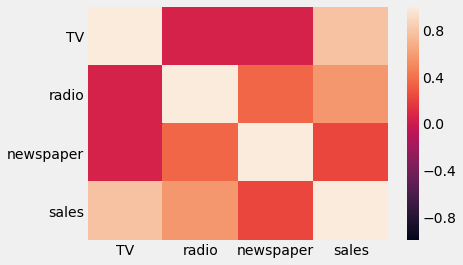

In [37]:
# 3. use Seaborn's `.heatmap()` function to make a plot of the correlation matrix
# - remember that we imported Seaborn as `sns`
# - to make a correlation matrix from a DataFrame, try `my_df.corr()`

# Answer:

sns.set_palette("coolwarm", 7)
sns.heatmap(data.corr(), vmin=-1, vmax=1);

Of course, looking at linear association doesn't show us the whole picture. We can get a more detailed look with a *scatterplot matrix*.
- see if you can guess or [figure out](http://seaborn.pydata.org/generated/seaborn.pairplot.html) how `pairplot()` might work.
- `pairplot()` plots each column against each column of a DataFrame. So, at the minimum you must have to pass in the DataFrame you want to analyze, right?

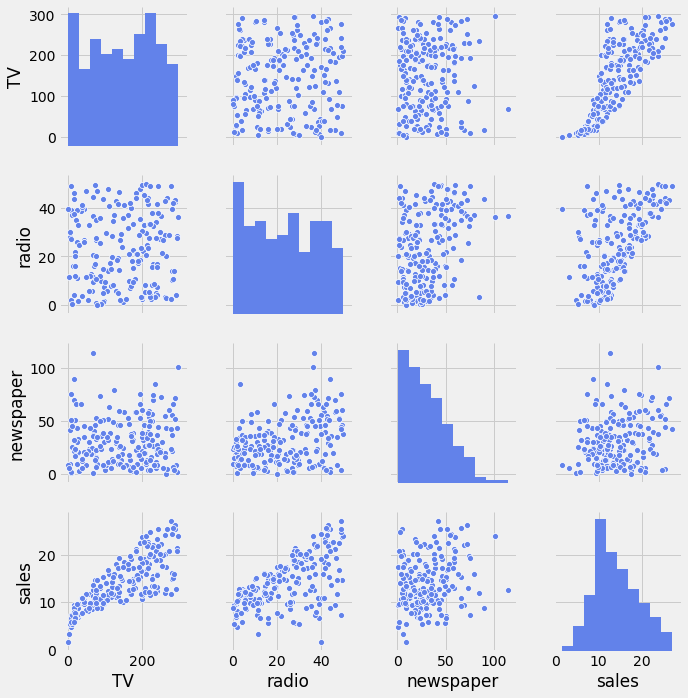

In [38]:
# 4. use Seaborn's `.pairplot()` function to make joint scatterplots of the data

# Answer:

sns.pairplot(data);

<a id="optional"></a>
# Optional
> Proceed with caution... *(if you dare!!!)*

<img src="https://r.hswstatic.com/w_907/gif/92d82dd6dbe8bee36364cd064aa20b3a-raiders-lost-ark.jpg" style="margin: auto; width: 300px;"/>

<a id="missing"></a>
## Missing data
---

Sometimes we are unable to collect every attribute for a particular observation.

Unfortunately, this makes the observation unusable until we decide how to deal with it.

**We have to decide whether to:**
    - Drop the observation.
    - Drop the attribute.
    - Impute a value for that specific attribute and observation.

**So, how do we decide?**

<a id="types"></a>
### Types of missing data

- **Missing completely at random (MCAR)**
    - The reason that the data are missing is completely random and introduces no sampling bias.
    - In this case, it's safe to drop or impute.
    - We can test for this by looking at other attributes for missing and non-missing groups to see if they match.

- **Missing at random (MAR)**
    - The data are missing in a way that is related to another factor.
    - This is a form of sampling bias.
    - Like other instances of sampling bias, we can fix this by modeling the selection process.
        - This is done by building a model to impute the missing value based on other variables.

- **Missing not at random (MNAR)**
    - The response is missing in a way that relates to its own value.
    - We can't test for this.
    - We also can't fix this in a reasonable way.

#### De minimis
- If few enough observations are missing, it's not likely to change our results to a meaningful degree.
- In these cases, we don't have to bother with trivialities and simply pick a method that works well enough.

<a id="class"></a>
### Class imbalance

Sometimes (i.e. *most* of the time) our sample may include an over-representation of one type of class. 
- For example, airport security may have 990 X-ray scans showing the absence of a weapon. Due to natural scarcity, it may only provide 10 scans showing a weapon.

- If our goal is to create a model that indicates whether or not a weapon is present, then we are at a disadvantage. **Ignoring the class imbalance** would lead to a model that always guesses that a weapon is not present!
    - Note that most optimization procedures optimize for training data accuracy. Always guessing that a weapon is absent leads to 990/1000 correct results; an accuracy of 99 percent.

- A simple way to get around this is to **undersample** the majority class, deliberately leaving us with a balanced data set of 10 each. However, this is less than ideal, as it effectively ignores much of the available data.

- Alternatively, we could **oversample** the minority class by duplicating examples. Again, this is not ideal. Because we have very little data, this will magnify small differences that may just be errors, leading to a model that overfits.

> Later in the course, we will look at additional methods for training models to work around class imbalance. 
>
> - For example, we may use an optimization algorithm that cares less about accuracy and more about minimizing particular **error types**.

<a id="error"></a>
### Error types

Statisticians often classify errors not just as errors but as one of two specific types of errors — type I and type II.

+ **Type I errors** are false positives.
    - Machine learning: Our model falsely predicts "positive." (The prediction is incorrect.)
    - Statistics: Incorrect rejection of a true null hypothesis.

+ **Type II errors** are false negatives.
    - Machine learning: Our model falsely predicts "negative." (The prediction is incorrect.)
    - Statistics: Incorrectly retaining a false null hypothesis.

Understanding these errors can be especially beneficial when designing models. For example, we might decide that type I errors are OK but type II errors are not. We can then optimize our model appropriately.

> **Example 1:** Suppose we make a model for airline security in which we predict whether or not a weapon is present ("positive"). In this case, we would much rather have type I errors (falsely predict a weapon) than type II errors (falsely predict no weapon).

> **Example 2:** Suppose we make a model for the criminal justice system in which we whether or not a defendant is guilty ("positive"). In this case, we would much rather have type II errors (falsely predict innocent) than type I errors (falsely predict guilty).

<a id="hypothesis"></a>
## Introduction to hypothesis testing
---

**Objective**: Test a hypothesis within a sample case study.

You'll remember that we've worked previously on descriptive statistics such as mean and variance. 
- How would we tell if there is a difference between our groups? 
- How would we know if this difference was real or if our finding is simply the result of chance?

For *example*, if we are working on sales data, how would we know if there was a difference between the buying patterns of men and women at Acme, Inc.? **Hypothesis testing!**

> **Note:** In this course, hypothesis testing is primarily used to assess foundational models such as linear and logistic regression.

### Hypothesis testing steps

Generally speaking, we start with a **null hypothesis** and an **alternative hypothesis**, which is the opposite of the null. Then, you check whether the data support rejecting your null hypothesis or fail to reject the null hypothesis.

For example:

- Null hypothesis: There is no relationship between gender and sales.
- Alternative hypothesis: There is a relationship between gender and sales.

Note that "failing to reject" the null hypothesis is *not* the same as "accepting" it. 
- Your alternative hypothesis may indeed be true, but you don't necessarily have enough data to show that yet.

> This distinction is *crucial* for helping you avoid overstating your findings. 
>
> - **You should only state what your data and analysis can truly represent!**

<a id="validate"></a>
### Validate your findings

#### How Do We Tell if the Association We Observed is Statistically Significant?

Statistical significance is the likelihood that a result or relationship is caused by something other than mere random chance. 
- Statistical hypothesis testing is traditionally employed to determine whether or not a result is statistically significant.

We might ask: **How likely is the effect observed to be true, assuming the null hypothesis is true?** 
- If the probability of our observation occurring by chance is **less than 5 percent** (supposing the null hypothesis), then we reject the null hypothesis. 
> Note that the 5 percent value is in many ways arbitrary — many statisticians require even higher confidence levels.

The probability of our observations occurring by chance, given the null hypothesis, is the **pvalue** ($p$).

> **Example:** Suppose you flip a coin three times and get three heads in a row. These three flips are our observations.

> + We want to know whether or not the coin is fair. So, we select the **null hypothesis: The coin is fair.**
> + Now, let's suppose the null hypothesis is true. Three heads in a row occurs with a chance of $1/2^3 \approx 12.5\%$.
> + Because there is a reasonable ($> 5\%$) chance of three heads occuring naturally, we do not reject the null hypothesis.
> + So, **we conclude** that we do not have enough data to tell whether or not the coin is fair ($p = 0.125$).

In other words, we say that something is NOT statistically significant if there is a less than 5 percent chance that our finding was caused by chance alone (assuming the null hypothesis is true).

<a id="confidence"></a>
### Confidence intervals

A closely related concept is **confidence intervals**. 
- A 95 percent confidence interval can be interpreted like so: 

    ***Under infinite sampling of the population, we would expect that the true value of the parameter we are estimating to fall within that range 95% of the time.***

Keep in mind that we only have a **single sample of data** and not the **entire population of the data**. 
- The "true" effect/difference is either within this interval or it is not. 
- We have no firm knowledge, however, that our single estimate of the "true" effect/difference is close or not to the "truth". 
- The confidence interval around our estimate tells us, with a given sample size and level of confidence, the range in which future estimates are likely to fall.

> **Note** that using 95 percent confidence intervals is just a convention. 
> - You can create 90 percent confidence intervals (which will be more liberal), 99 percent confidence intervals (which will be more conservative), or whatever intervals you prefer.

<a id="relation"></a>
### Relation to machine learning

Many of the topics discussed in this lesson are used in both statistics and machine learning. However, some of the terminology differs.

Throughout this lesson, we have discussed **variables** (typically **independent variables** and **dependent variables**). 
- For *example*, we might be given the **linear estimator** $Y = mX + b$. 
- We could say that this contains two variables ($X$ - independent and $Y$ - dependent (i.e., the prediction, as it depends on $X$)), a coefficient of $m$, and the constant of $b$.

In machine learning, we typically rewrite this as a function — $\hat{y}(x) = mx + b$ — and call it a **linear model**. 
- The predicted value is $\hat{y}(x)$ ("prediction" is denoted by the carat), which is dependent on $x$. 
- We might call $x$ a **feature** rather than a variable.

> **Example:** Suppose a house price $P$ is linearly dependent on its square footage $S$. 
- So, we might predict $P = cS + b$, where $c$ and $b$ are constants. 
- Alternatively, we could write $\hat{p}(s) = cs + b$. 
- Here, we took a complicated house and modeled it using a single feature — its square footage. 
- Of course, we are likely missing many confounding variables/features that also affect the price! 
- So, our model likely contains a lot of errors.

<a id="practice"></a>
**Additional practice materials** inside of `lesson06/practice/'`:
- [A/B testing](./practice/AB-testing.ipynb)
- [EDA w/ music data](./practice/eda-with-billboard-data-lab.ipynb)
- [EDA w/ telecomm data](./practice/telecomm-eda-group-lab.ipynb)